<Axes: >

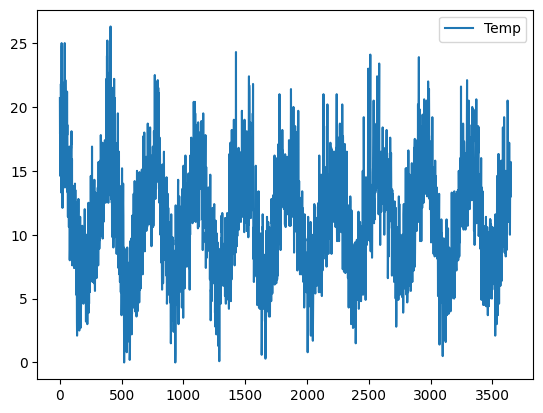

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Load the dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"
df = pd.read_csv(url)

#plot data

df.plot()

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Prepare the data
# Create lag features (predict today's temperature using yesterday's temperature)
df['LagTemp'] = df['Temp'].shift(1)
df.dropna(inplace=True)

df.head()

,Date,Temp,LagTemp
1,1981-01-02,17.9,20.7
2,1981-01-03,18.8,17.9
3,1981-01-04,14.6,18.8
4,1981-01-05,15.8,14.6
5,1981-01-06,15.8,15.8


Mean Absolute Error (MAE) on Validation Set: 1.96


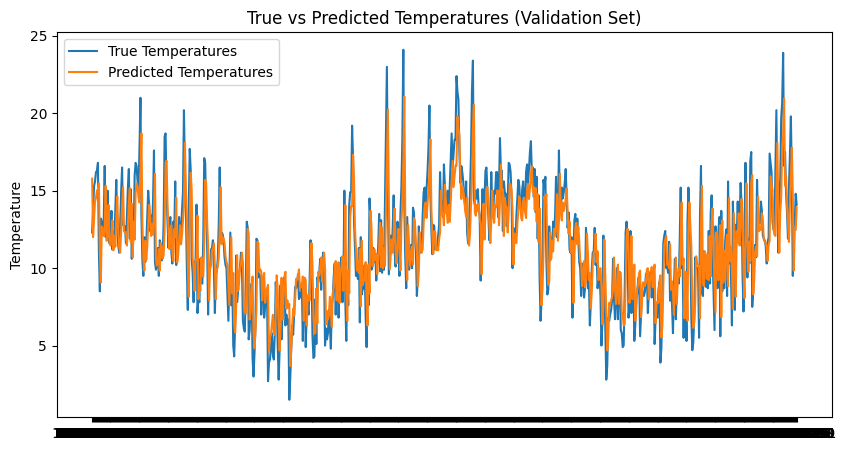

In [20]:
X = df[['LagTemp']]  # Features (yesterday's temperature)
y = df['Temp']    # Target (today's temperature)

# First split into train + temp (train + validation), and test
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Then split train_temp into actual train and validation
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, shuffle=False)  # 0.25 * 0.8 = 0.2

# Step 4: Fit a linear regression model on the training data
model = LinearRegression()
model.fit(X_train, y_train)

# Step 5: Make predictions on the training, validation, and test sets
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Step 6: Measure MAE for training, validation, and test sets
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_val = mean_absolute_error(y_val, y_val_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

# Print the MAE for training, validation, and test sets
#print(f"Mean Absolute Error (MAE) on Training Set: {mae_train:.4f}")
print(f"Mean Absolute Error (MAE) on Validation Set: {mae_val:.2f}")
#print(f"Mean Absolute Error (MAE) on Test Set: {mae_test:.4f}")

# Optional: Plot the results for the validation set
plt.figure(figsize=(10,5))
plt.plot(df['Date'][-len(y_val):], y_val, label='True Temperatures')
plt.plot(df['Date'][-len(y_val):], y_val_pred, label='Predicted Temperatures')
plt.ylabel('Temperature')
plt.title('True vs Predicted Temperatures (Validation Set)')
plt.legend()
plt.show()


In [21]:
!pip install prophet

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpveydyh8i/xk9okuu_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpveydyh8i/mugqkbqb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29550', 'data', 'file=/tmp/tmpveydyh8i/xk9okuu_.json', 'init=/tmp/tmpveydyh8i/mugqkbqb.json', 'output', 'file=/tmp/tmpveydyh8i/prophet_model_4jwfehr/prophet_model-20241022092236.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:22:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:22:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Mean Absolute Error (MAE) on Validation Set: 2.2428


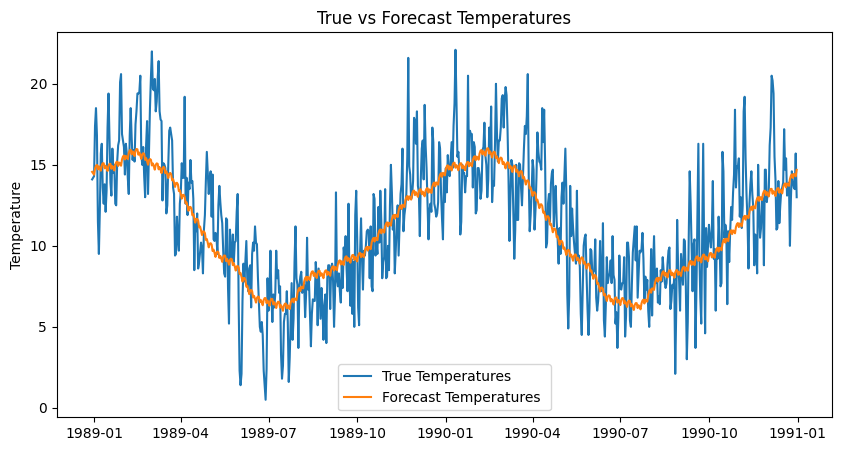

In [24]:
from prophet import Prophet

df_prophet = pd.read_csv(url)

# Step 2: Prepare the data for Prophet
# Prophet expects a dataframe with columns 'ds' for dates and 'y' for values
df_prophet['ds'] = pd.to_datetime(df_prophet['Date'])
df_prophet['y'] = df_prophet['Temp']
df_prophet = df_prophet[['ds', 'y']]  # Keep only the relevant columns

# Step 3: Split the data into train, validation, and test sets
train_val_size = int(0.8 * len(df))
train_size = int(0.6 * len(df))

train_df = df_prophet.iloc[:train_size]
val_df = df_prophet.iloc[train_size:train_val_size]
test_df = df_prophet.iloc[train_val_size:]

# Step 4: Fit the Prophet model on the training data
model = Prophet()
model.fit(train_df)

# Step 5: Make predictions on the validation data
future_val = val_df[['ds']]
forecast_val = model.predict(future_val)

# Step 6: Make predictions on the test data
future_test = test_df[['ds']]
forecast_test = model.predict(future_test)

# Step 7: Measure MAE on validation and test sets
mae_val = mean_absolute_error(val_df['y'], forecast_val['yhat'])
mae_test = mean_absolute_error(test_df['y'], forecast_test['yhat'])

# Print the MAE for validation and test sets
print(f"Mean Absolute Error (MAE) on Validation Set: {mae_val:.4f}")

# Optional: Plot the results for the test set
plt.figure(figsize=(10,5))
plt.plot(test_df['ds'], test_df['y'], label='True Temperatures ')
plt.plot(test_df['ds'], forecast_test['yhat'], label='Forecast Temperatures ')
plt.ylabel('Temperature')
plt.title('True vs Forecast Temperatures')
plt.legend()
plt.show()